In [65]:
# Libary
import pm4py
import pandas as pd

In [66]:
# Import the XES file
filepath = 'BPI_Challenge_2013_incidents.xes'
df = pm4py.read_xes(filepath)
df

parsing log, completed traces :: 100%|██████████| 7554/7554 [00:04<00:00, 1713.61it/s]


,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name
0,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 16:59:42+00:00,1-364285768
1,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 17:00:56+00:00,1-364285768
2,V5 3rd,France,fr,Frederic,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-03-31 17:45:48+00:00,1-364285768
3,V5 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 16:44:07+00:00,1-364285768
4,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 16:44:38+00:00,1-364285768
...,...,...,...,...,...,...,...,...,...,...,...,...
65528,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Low,PROD424,In Call,2012-05-05 04:07:43+00:00,1-740866691
65529,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 06:58:40+00:00,1-740866708
65530,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 07:02:39+00:00,1-740866708
65531,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Medium,PROD562,In Call,2012-05-05 07:23:03+00:00,1-740866708


Frequency of Activities:
 concept:name
Accepted     40117
Completed    13867
Queued       11544
Unmatched        5
Name: count, dtype: int64


<Axes: title={'center': 'Activity Frequency'}, xlabel='Activities', ylabel='Frequency'>

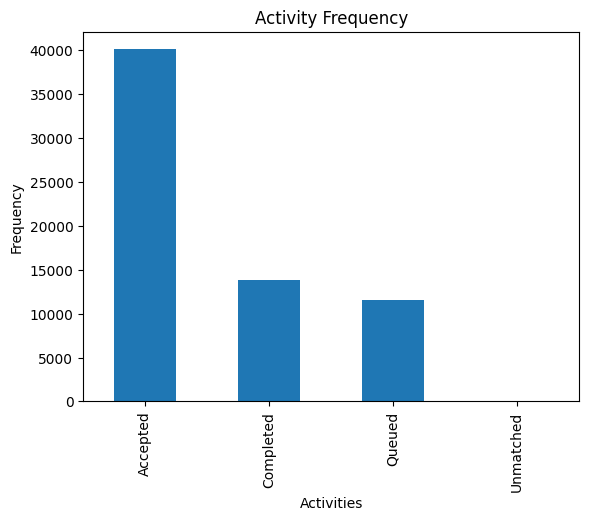

In [67]:
# calculate the frequency of activities
activity_counts = df['concept:name'].value_counts()
print("Frequency of Activities:\n", activity_counts)
# graphical representation of the activity frequency
activity_counts.plot(kind='bar', title='Activity Frequency', xlabel='Activities', ylabel='Frequency')

In [68]:
# function to filter out irrelevant activities
def filter_irrelevant_activities(df, irrelevant_activities):
    return df[~df['concept:name'].isin(irrelevant_activities)]

In [69]:
# remove irrelevant activities
df = filter_irrelevant_activities(df, ['Unmatched'])

# check if the removal was successful
activity_counts = df['concept:name'].value_counts()
print("Frequency of Activities:\n", activity_counts)

Frequency of Activities:
 concept:name
Accepted     40117
Completed    13867
Queued       11544
Name: count, dtype: int64


In [70]:
# count the number of cases per resource
rosource_cases = df.groupby('org:resource')['case:concept:name'].nunique() 
print(rosource_cases)
resource_cases = rosource_cases.sort_values(ascending=False).head(10)  # get the top 10 resources by number of cases
resource_cases
# plot the number of cases per resource
#rosource_cases.plot(kind='bar', title='Number of Cases per Resource', xlabel='Resource', ylabel='Number of Cases')



org:resource
-             12
Aaron         13
Abby          13
Abdelkader     1
Abdul         25
              ..
Zoi           69
yoshiyuki      1
Åke            3
Åsa           23
Åse            1
Name: case:concept:name, Length: 1438, dtype: int64


org:resource
Siebel       5333
Krzysztof     339
Marika        252
Pawel         225
Fredrik       193
Marcin        191
Andreas       173
Michael       169
Piotr         165
Tomasz        162
Name: case:concept:name, dtype: int64

In [71]:
# count the number of events and cases
num_events = len(df) # count the number of events
num_cases = len(df['case:concept:name'].unique()) # count the number of unique cases
print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

# check the start and end activities and their frequency
start_activities = pm4py.get_start_activities(df) # which are the start activities and their frequency
end_activities = pm4py.get_end_activities(df) # wich are the end activities and their frequency
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Number of events: 65528
Number of cases: 7554
Start activities: {'Accepted': 6394, 'Queued': 1156, 'Completed': 4}
End activities: {'Completed': 7546, 'Accepted': 8}


In [72]:
# check something
activities = pm4py.filter_start_activities(df, ['Accepted'])
#activities = pm4py.filter_end_activities(df, ['Accepted'])
activities = pm4py.get_variants(activities)
activities

{('Accepted',
  'Accepted',
  'Queued',
  'Accepted',
  'Queued',
  'Accepted',
  'Completed',
  'Queued',
  'Accepted',
  'Queued',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Completed',
  'Completed'): 1,
 ('Accepted',
  'Accepted',
  'Queued',
  'Accepted',
  'Accepted',
  'Queued',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Queued',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Queued',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Accepted',
  'Queued',
  'Accepted',
  'Queued',
  'Accepted',
  'Completed',
  'Completed'): 1,
 ('Accepted',
  'Accepted',
  'Queued',
  'Accepted',
  'Queued',
  'Accepted',
  'Queued',
  'Accepted',
  'Queued',
  'Accepted',
  'Accepted',
  'Queued',
  'Accepted',
  'Accepted',
  'Accepted',
  'Comple

In [73]:
# remove incongruent activities
df = pm4py.filter_start_activities(
    df,
    ['Completed'],  # initial activity to remove
    retain=False
)

df = pm4py.filter_end_activities(        
    df,
    ['Accepted'],  # final activity to remove
    retain=False
)

# check if the removal was successful
start_activities = pm4py.get_start_activities(df) 
end_activities = pm4py.get_end_activities(df) 
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'Accepted': 6386, 'Queued': 1156}
End activities: {'Completed': 7542}


In [74]:
# check the start and end activities and their frequency
start_activities = pm4py.get_start_activities(df, activity_key='lifecycle:transition') 
end_activities = pm4py.get_end_activities(df, activity_key = 'lifecycle:transition') 
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'In Progress': 6365, 'Awaiting Assignment': 1156, 'Wait - User': 12, 'Wait': 3, 'Assigned': 3, 'Wait - Vendor': 2, 'Wait - Implementation': 1}
End activities: {'Closed': 5573, 'In Call': 1882, 'Resolved': 86, 'Cancelled': 1}


In [75]:
# remove initial and final activities that are not relevant for the analysis
df = pm4py.filter_start_activities(
    df,
    ['Wait - User', 'Wait', 'Resolved', 'Assigned', 'Wait - Vendor', 'In Call', 'Wait - Implementation' ],  # initial activities to remove
    retain=False
    , activity_key='lifecycle:transition'
)

df = pm4py.filter_end_activities(        
    df,
    ['Cancelled', 'In Progress', 'Wait - Implementation', 'Wait - User', 'Assigned'],  # final activities to remove
    retain=False
    , activity_key='lifecycle:transition'
)

# check if the removal was successful
start_activities = pm4py.get_start_activities(df, activity_key='lifecycle:transition') 
end_activities = pm4py.get_end_activities(df, activity_key='lifecycle:transition') 
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'In Progress': 6364, 'Awaiting Assignment': 1156}
End activities: {'Closed': 5563, 'In Call': 1882, 'Resolved': 75}


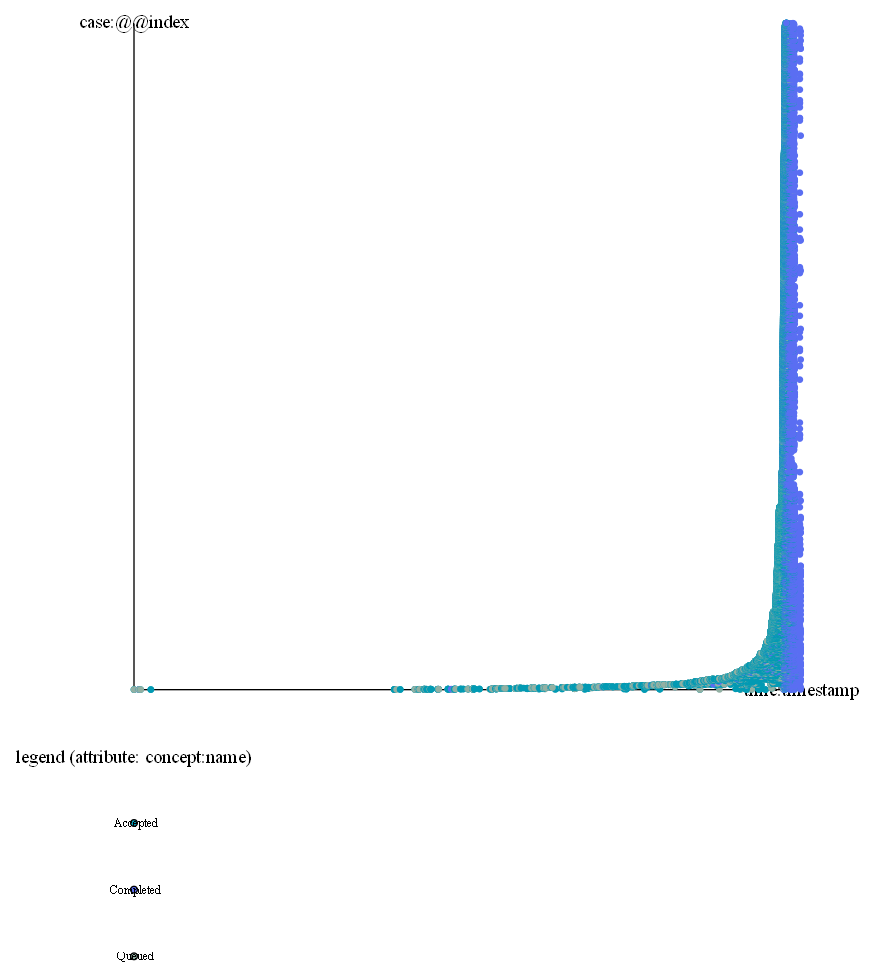

In [76]:
# visualization of the dotted chart, which shows the distribution of activities over time
pm4py.view_dotted_chart(df)

In [77]:
# sort the DataFrame by timestamp and display the first 20 rows
df.sort_values(by='time:timestamp', ascending=True).head(20)

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name
0,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 16:59:42+00:00,1-364285768
1,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 17:00:56+00:00,1-364285768
2,V5 3rd,France,fr,Frederic,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-03-31 17:45:48+00:00,1-364285768
3,V5 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 16:44:07+00:00,1-364285768
4,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 16:44:38+00:00,1-364285768
5,V13 2nd 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 16:44:47+00:00,1-364285768
6,V13 2nd 3rd,France,fr,Anne Claire,Org line A2,A2_5,Completed,Medium,PROD582,Resolved,2010-04-06 16:44:51+00:00,1-364285768
7,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 16:45:07+00:00,1-364285768
8,V30,France,fr,Eric,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-04-08 12:52:23+00:00,1-364285768
9,V5 3rd,France,fr,Eric,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-04-08 12:53:35+00:00,1-364285768


In [78]:
# filter the DataFrame by a specific time range
df = pm4py.filter_time_range( 
    df,
    '2011-01-30 00:00:00',
    '2012-05-24 00:00:00',
    mode='traces_contained',                # inside the range
    case_id_key='case:concept:name',       
    timestamp_key='time:timestamp'
)
df.sort_values(by='time:timestamp', ascending=True).head(20)

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name
17,S42,Sweden,se,Adam,Org line C,V3_2,Accepted,Medium,PROD453,In Progress,2011-01-31 11:12:22+00:00,1-467153946
18,S42,Sweden,se,Adam,Org line C,V3_2,Accepted,Medium,PROD453,In Progress,2011-01-31 11:18:44+00:00,1-467153946
19,N52 2nd,Sweden,se,Adam,Org line C,V3_2,Queued,Medium,PROD453,Awaiting Assignment,2011-01-31 11:19:05+00:00,1-467153946
20,N52 2nd,Sweden,se,Denny,Org line C,V3_2,Accepted,Medium,PROD453,In Progress,2011-01-31 12:59:46+00:00,1-467153946
21,N52 2nd,Sweden,se,Denny,Org line C,V3_2,Accepted,Medium,PROD453,Wait - User,2011-01-31 14:37:55+00:00,1-467153946
22,O3 3rd,Sweden,se,Denny,Org line C,C_6,Queued,Medium,PROD453,Awaiting Assignment,2011-02-03 08:28:58+00:00,1-467153946
23,O3 3rd,Sweden,se,Paul,Org line C,C_6,Accepted,Medium,PROD453,In Progress,2011-02-07 12:37:33+00:00,1-467153946
24,O3 3rd,Sweden,se,Paul,Org line C,C_6,Accepted,Medium,PROD453,Wait - Implementation,2011-02-07 12:38:25+00:00,1-467153946
57,D5,Belgium,nl,Bert,Org line C,A2_1,Accepted,Medium,PROD706,In Progress,2011-02-24 16:17:46+00:00,1-503573772
58,D5,Belgium,nl,Bert,Org line C,A2_1,Accepted,Medium,PROD706,In Progress,2011-02-24 16:17:52+00:00,1-503573772


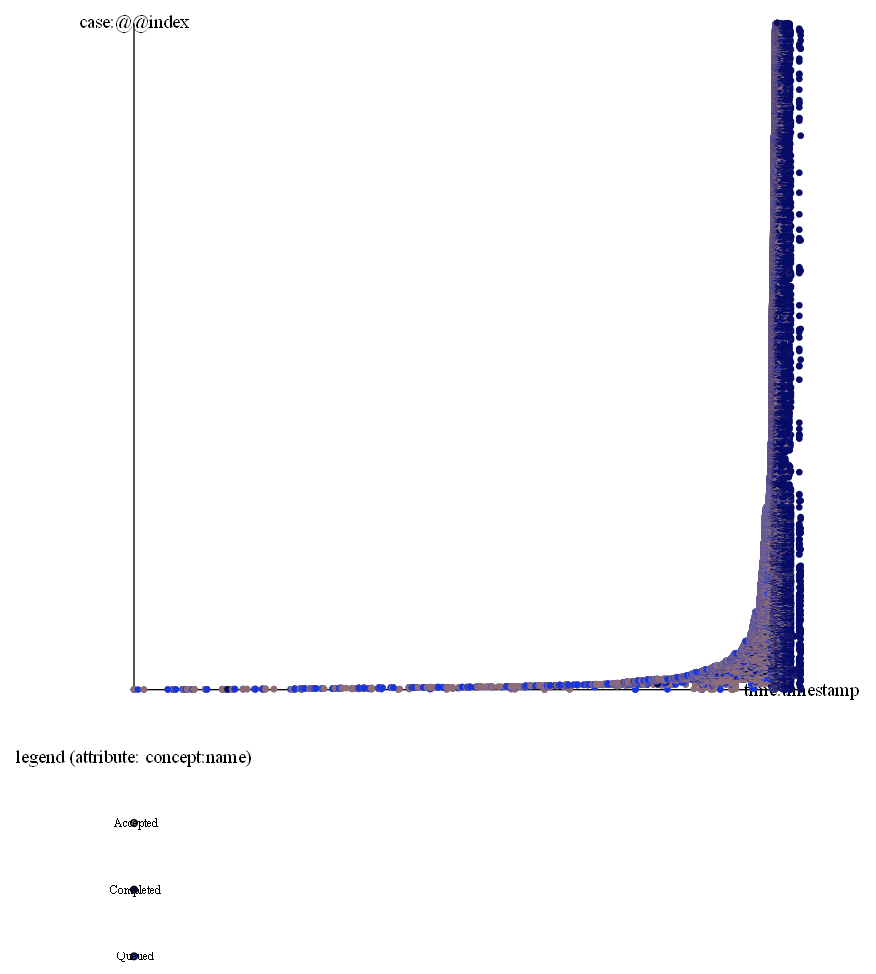

In [79]:
pm4py.view_dotted_chart(df)

In [80]:
# check if there are cases with zero duration
print("Number of events before filtering: {}".format(len(df)))
prova = pm4py.filter_case_performance(df, 0, 0)  
num_events = len(prova)
print("Number of events after filtering: {}".format(num_events))

Number of events before filtering: 65310
Number of events after filtering: 0


In [81]:
# function to filter out rows with missing timestamps
def filter_errors(df):
    return df.dropna(subset=['time:timestamp'])  # remove rows with missing timestamps

In [82]:
# apply the function to remove rows with missing timestamps
prova = filter_errors(df)
print("Number of events after filtering errors: {}".format(len(prova)))

Number of events after filtering errors: 65310


In [83]:
# function to filter out events with zero duration
def filter_zero_duration(df):
    df['Next_Timestamp'] = df.groupby('case:concept:name')['time:timestamp'].shift(-1) # create a column with the timestamp of the next event
    df['Duration'] = (df['Next_Timestamp'] - df['time:timestamp']).dt.total_seconds() # create a column with the duration of the event
    return df[df['Duration'] != 0].drop(columns=['Next_Timestamp', 'Duration']) # remove the rows that contain an event (which together make up a case) that has a duration of 0

In [84]:
# apply the function to remove events with zero duration
prova = filter_zero_duration(df)
print("Number of events after filtering zero duration: {}".format(len(prova)))

Number of events after filtering zero duration: 65310


In [85]:
# prima di segmentare controllo quanti dipartement ci sono e di quanti casi si occupano
departement = df.groupby('organization involved')['case:concept:name'].nunique()  # controllo il numero di casi per ogni risorsa
departement.sort_values(ascending=False)



organization involved
Org line C      6103
Org line A2     1786
Org line B       626
Other            560
Org line G4      208
Org line V11     126
Org line V7n      76
Org line V2       68
Org line G1       54
Org line G2       37
Org line V5       36
Org line E        31
Org line V7       20
Org line F        17
Org line V8       11
Org line V10       9
Org line V3        8
Org line V9        8
Org line H         7
Org line G3        5
Org line D         4
Org line V1        3
Org line V         1
Org line I         1
Org line V4        1
Name: case:concept:name, dtype: int64

In [86]:
# segmentation of the log based on support lines
support_lines = df['organization involved'].unique()

segmented_logs = {}

for support_line in support_lines:
    filtered_df = df[df['organization involved'] == support_line]  # filter the DataFrame for the current support line
    if not filtered_df.empty:  # check if the filtered DataFrame is not empty
        segmented_logs[support_line] = filtered_df  # add the filtered DataFrame to the dictionary


#segmented_logs['Org line C']


In [87]:
# create a sub DataFrame that contains only the suspicious ping pong cases
cases = df['case:concept:name'].unique()  # obtain the unique cases

ping_pong_df =pd.DataFrame()  # create an empty DataFrame to store cases with multiple groups

for case in cases:
    filtered_df = df[df['case:concept:name'] == case]  # filter the dataframe for the current case
    if len(filtered_df['org:group'].unique()) > 1:
        ping_pong_df = pd.concat([ping_pong_df, filtered_df])  # add the case to the DataFrame of cases with multiple groups



In [88]:
# forse non serve, volevo ridurre il numero di gruppi concetrandomi su quelli più frequenti per riuscire a visualizzare il processo
# maybe not needed, I wanted to reduce the number of groups by focusing on the most frequent ones to visualize the process
group_freq=ping_pong_df.groupby('org:group')['org:group'].count().reset_index(name='count')  # conto il numero di eventi per ogni gruppo
group_freq.sort_values(by='count', ascending=False, inplace=True)  # ordino i gruppi in base al numero di eventi
most_freq_group= group_freq.head(5)  
most_freq_group

,org:group,count
284,G97,6642
283,G96,2941
137,G230 2nd,1661
50,D5,1421
53,D8,1304


In [89]:

# create a sub DataFrame that contains only the cases that represent the most frequent groups, no longer used
ping_pong_prova = pm4py.filter_event_attribute_values(ping_pong_df,level='case', attribute_key='org:group', values=most_freq_group['org:group'].tolist()) 
ping_pong_prova

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name,Next_Timestamp,Duration
57,D5,Belgium,nl,Bert,Org line C,A2_1,Accepted,Medium,PROD706,In Progress,2011-02-24 16:17:46+00:00,1-503573772,2011-02-24 16:17:52+00:00,6.0
58,D5,Belgium,nl,Bert,Org line C,A2_1,Accepted,Medium,PROD706,In Progress,2011-02-24 16:17:52+00:00,1-503573772,2011-02-24 16:19:35+00:00,103.0
59,V37 2nd,Belgium,nl,Bert,Org line V7n,NaN,Queued,Medium,PROD706,Awaiting Assignment,2011-02-24 16:19:35+00:00,1-503573772,2011-02-28 13:46:38+00:00,336423.0
60,V37 2nd,Netherlands,nl,Luc,Org line V7n,NaN,Accepted,Medium,PROD706,In Progress,2011-02-28 13:46:38+00:00,1-503573772,2011-02-28 13:47:22+00:00,44.0
61,D5,Netherlands,nl,Luc,Org line C,A2_1,Queued,Medium,PROD706,Awaiting Assignment,2011-02-28 13:47:22+00:00,1-503573772,2011-02-28 13:48:12+00:00,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65465,G96,Sweden,br,Joakim,Org line C,V3_2,Accepted,Low,PROD279,In Progress,2012-05-06 01:02:57+00:00,1-740859781,2012-05-06 01:03:14+00:00,17.0
65466,S9 2nd,Sweden,br,Joakim,Org line B,V3_2,Queued,Low,PROD279,Awaiting Assignment,2012-05-06 01:03:14+00:00,1-740859781,2012-05-07 15:25:31+00:00,138137.0
65467,G97,Brazil,br,Eduardo,Org line C,V3_2,Accepted,Low,PROD279,In Progress,2012-05-07 15:25:31+00:00,1-740859781,2012-05-08 01:02:52+00:00,34641.0
65468,S9 2nd,Brazil,br,Priscila,Org line B,V3_2,Queued,Low,PROD279,Awaiting Assignment,2012-05-08 01:02:52+00:00,1-740859781,2012-05-08 22:56:54+00:00,78842.0


In [90]:
#ping_pong_df
#Directly Follows Graph (DFG)

#Create graph from log
#dfg, start_activities, end_activities = pm4py.discover_dfg(ping_pong_prova, activity_key='org:group')

# Visualise
#pm4py.view_dfg(dfg, start_activities, end_activities)

In [91]:
# create process map with frequencies
process_map = pm4py.discover_dfg(ping_pong_df, activity_key='org:group')

# correct the visualization - it requires all three elements
dfg, start_activities, end_activities = process_map

# to highlight the loops, you can filter the activities that have high bidirectional frequency
bidirectional_edges = []
for (act1, act2), freq1 in dfg.items():
    if (act2, act1) in dfg:
        freq2 = dfg[(act2, act1)]
        if min(freq1, freq2) / max(freq1, freq2) > 0.5:  # balancing threshold
            bidirectional_edges.append(((act1, act2), freq1, freq2))

print("Possibly bidirectional edges:")
for edge, f1, f2 in bidirectional_edges:
    if( edge[0] != edge[1]):
        print(f"{edge}: {f1} ↔ {f2}")



Possibly bidirectional edges:
('A1', 'D2'): 1 ↔ 1
('A10', 'G57 2nd'): 1 ↔ 1
('A11', 'D4'): 5 ↔ 5
('A13', 'G54 2nd'): 1 ↔ 1
('A14', 'D2'): 4 ↔ 4
('A14', 'D3'): 5 ↔ 5
('A14', 'D7'): 9 ↔ 12
('A14', 'D8'): 7 ↔ 8
('A14', 'G179'): 3 ↔ 3
('A14', 'G336 3rd'): 7 ↔ 6
('A3', 'V46 2nd'): 10 ↔ 9
('A4', 'D4'): 4 ↔ 6
('A5', 'D4'): 12 ↔ 17
('A5', 'G56 3rd'): 1 ↔ 1
('A5', 'V49'): 2 ↔ 3
('A8 2nd', 'D1'): 1 ↔ 1
('A9', 'D4'): 10 ↔ 10
('B1 2nd', 'D2'): 1 ↔ 1
('B10 2nd', 'D1'): 35 ↔ 35
('B15 3rd', 'N2 2nd'): 1 ↔ 1
('B16 2nd', 'N18 2nd'): 16 ↔ 15
('C6 2nd', 'D1'): 13 ↔ 13
('C9', 'G96'): 1 ↔ 1
('C9', 'S9 2nd'): 5 ↔ 4
('D1', 'A8 2nd'): 1 ↔ 1
('D1', 'B10 2nd'): 35 ↔ 35
('D1', 'C6 2nd'): 13 ↔ 13
('D1', 'D4'): 3 ↔ 3
('D1', 'G12 2nd'): 2 ↔ 2
('D1', 'G179'): 9 ↔ 8
('D1', 'G92'): 1 ↔ 1
('D1', 'J2 2nd'): 7 ↔ 7
('D1', 'L6 2nd'): 2 ↔ 2
('D1', 'N19 2nd'): 2 ↔ 2
('D1', 'T17 2nd'): 27 ↔ 28
('D1', 'V29 2nd'): 1 ↔ 1
('D1', 'V32 2nd'): 3 ↔ 2
('D1', 'V37 2nd'): 5 ↔ 4
('D2', 'A1'): 1 ↔ 1
('D2', 'A14'): 4 ↔ 4
('D2', 'B1 2nd'): 

In [92]:
#function that finds ping-pong cases, the cases they are contained in, and the duration of this behavior for each case
def find_ping_pong_cases( df, group_column = 'org:group'):
    results = []

    for case_id, group in df.groupby('case:concept:name'):
        group_in_case = group.sort_values('time:timestamp')[group_column].tolist()
        timestamps_in_case = group.sort_values('time:timestamp')['time:timestamp'].tolist()
        i = 0
        while i < len(group_in_case) - 2:
            d1 = group_in_case[i]
            d2 = group_in_case[i+1]
            d3 = group_in_case[i+2]
            # A ping-pong occurs if d1 -> d2 -> d1
            if d1 == d3 and d1 != d2:
                pair = tuple(sorted((d1, d2))) # Sort to always have the same tuple (e.g. ('A', 'B') not ('B', 'A'))
                
                # find sequences longer than ping-pong
                j = i + 3
                while j < len(group_in_case) - 1:
                    d_curr = group_in_case[j]
                    d_next = group_in_case[j+1]
                    if (d_curr == pair[0] and d_next == pair[1]) or \
                       (d_curr == pair[1] and d_next == pair[0]):
                        j += 2
                    else:
                        break
                # if the sequence is at least 3 activities long (d1->d2->d1 or d2->d1->d2 or d1->d2->d1->d2 or d2->d1->d2->d1)
                # Or more (d1->d2->d1->d2->d1...)
                if (j - i) >= 3 :
                    start_time_ping_pong = timestamps_in_case[i]
                    end_time_ping_pong = timestamps_in_case[j-1]
                    ping_pong_duration = (end_time_ping_pong - start_time_ping_pong).total_seconds()  # Calculate the duration in seconds

                    results.append({
                        'pairs': pair, 
                        'case_id': case_id,
                        'duration': ping_pong_duration
                    })
                    i = j - 1 # skip the activities already considered in the sequence
            i += 1
    ping_pong_df_results = pd.DataFrame(results)
    return ping_pong_df_results

ping_pong_cases = find_ping_pong_cases(ping_pong_df)

#ping_pong_cases.groupby('pairs')['case_id'].nunique().sort_values(ascending=False).head(40)  # show the number of unique cases for each ping-pong pair, sorted by frequency

ping_pong_cases


,pairs,case_id,duration
0,"(V32 2nd, V37 2nd)",1-503573772,416120.0
1,"(D8, V37 2nd)",1-506071646,112.0
2,"(D4, D6)",1-530838254,129.0
3,"(D6, V37 2nd)",1-530838254,67.0
4,"(D2, V37 2nd)",1-532109338,8533.0
...,...,...,...
259,"(C6 2nd, D1)",1-740638521,401649.0
260,"(D4, N26 2nd)",1-740683906,2127.0
261,"(D2, N14 2nd)",1-740730139,2947.0
262,"(G96, G97)",1-740791340,8709.0


In [93]:
# frequency of ping-pong pairs
frequency_ping_pong_pairs = ping_pong_cases.groupby('pairs')['case_id'].nunique().reset_index(name='frequency')
frequency_ping_pong_pairs_df = frequency_ping_pong_pairs.sort_values(by='frequency', ascending=False)
frequency_ping_pong_pairs_df



,pairs,frequency
90,"(G358 2nd, S9 3rd)",16
89,"(G358 2nd, S12)",8
145,"(N36, N51)",8
171,"(V32 2nd, V37 2nd)",7
6,"(C6 2nd, D1)",6
...,...,...
167,"(V10 3rd, V11 3rd)",1
169,"(V26, V45)",1
170,"(V26, V51 2nd)",1
172,"(V37 2nd, V38 3rd)",1


In [94]:
# calculate the mean duration of ping-pong for each pair
mean_duration = ping_pong_cases.groupby('pairs')['duration'].mean().reset_index(name='mean_duration')
mean_duration['mean_duration'] = mean_duration['mean_duration'] / 3600  # convert seconds to hours
mean_duration = mean_duration.sort_values(by='mean_duration', ascending=False)
mean_duration

,pairs,mean_duration
140,"(M10, M27)",1437.642778
171,"(V32 2nd, V37 2nd)",781.100675
120,"(G96, N42)",737.541111
45,"(G120 3rd, G121 2nd)",677.238056
65,"(G222 2nd, W3)",507.531389
...,...,...
31,"(D6, V37 2nd)",0.018611
60,"(G197 2nd, S37)",0.018056
28,"(D5, V37 2nd)",0.016667
16,"(D2, V50 2nd)",0.013333


In [95]:
# mean duration of ping-pong
total_mean_duration = mean_duration['mean_duration'].mean()  # calculate the total mean duration of ping-pong
print("Total mean duration of ping-pong: {:.2f} hours".format(total_mean_duration))

Total mean duration of ping-pong: 58.11 hours


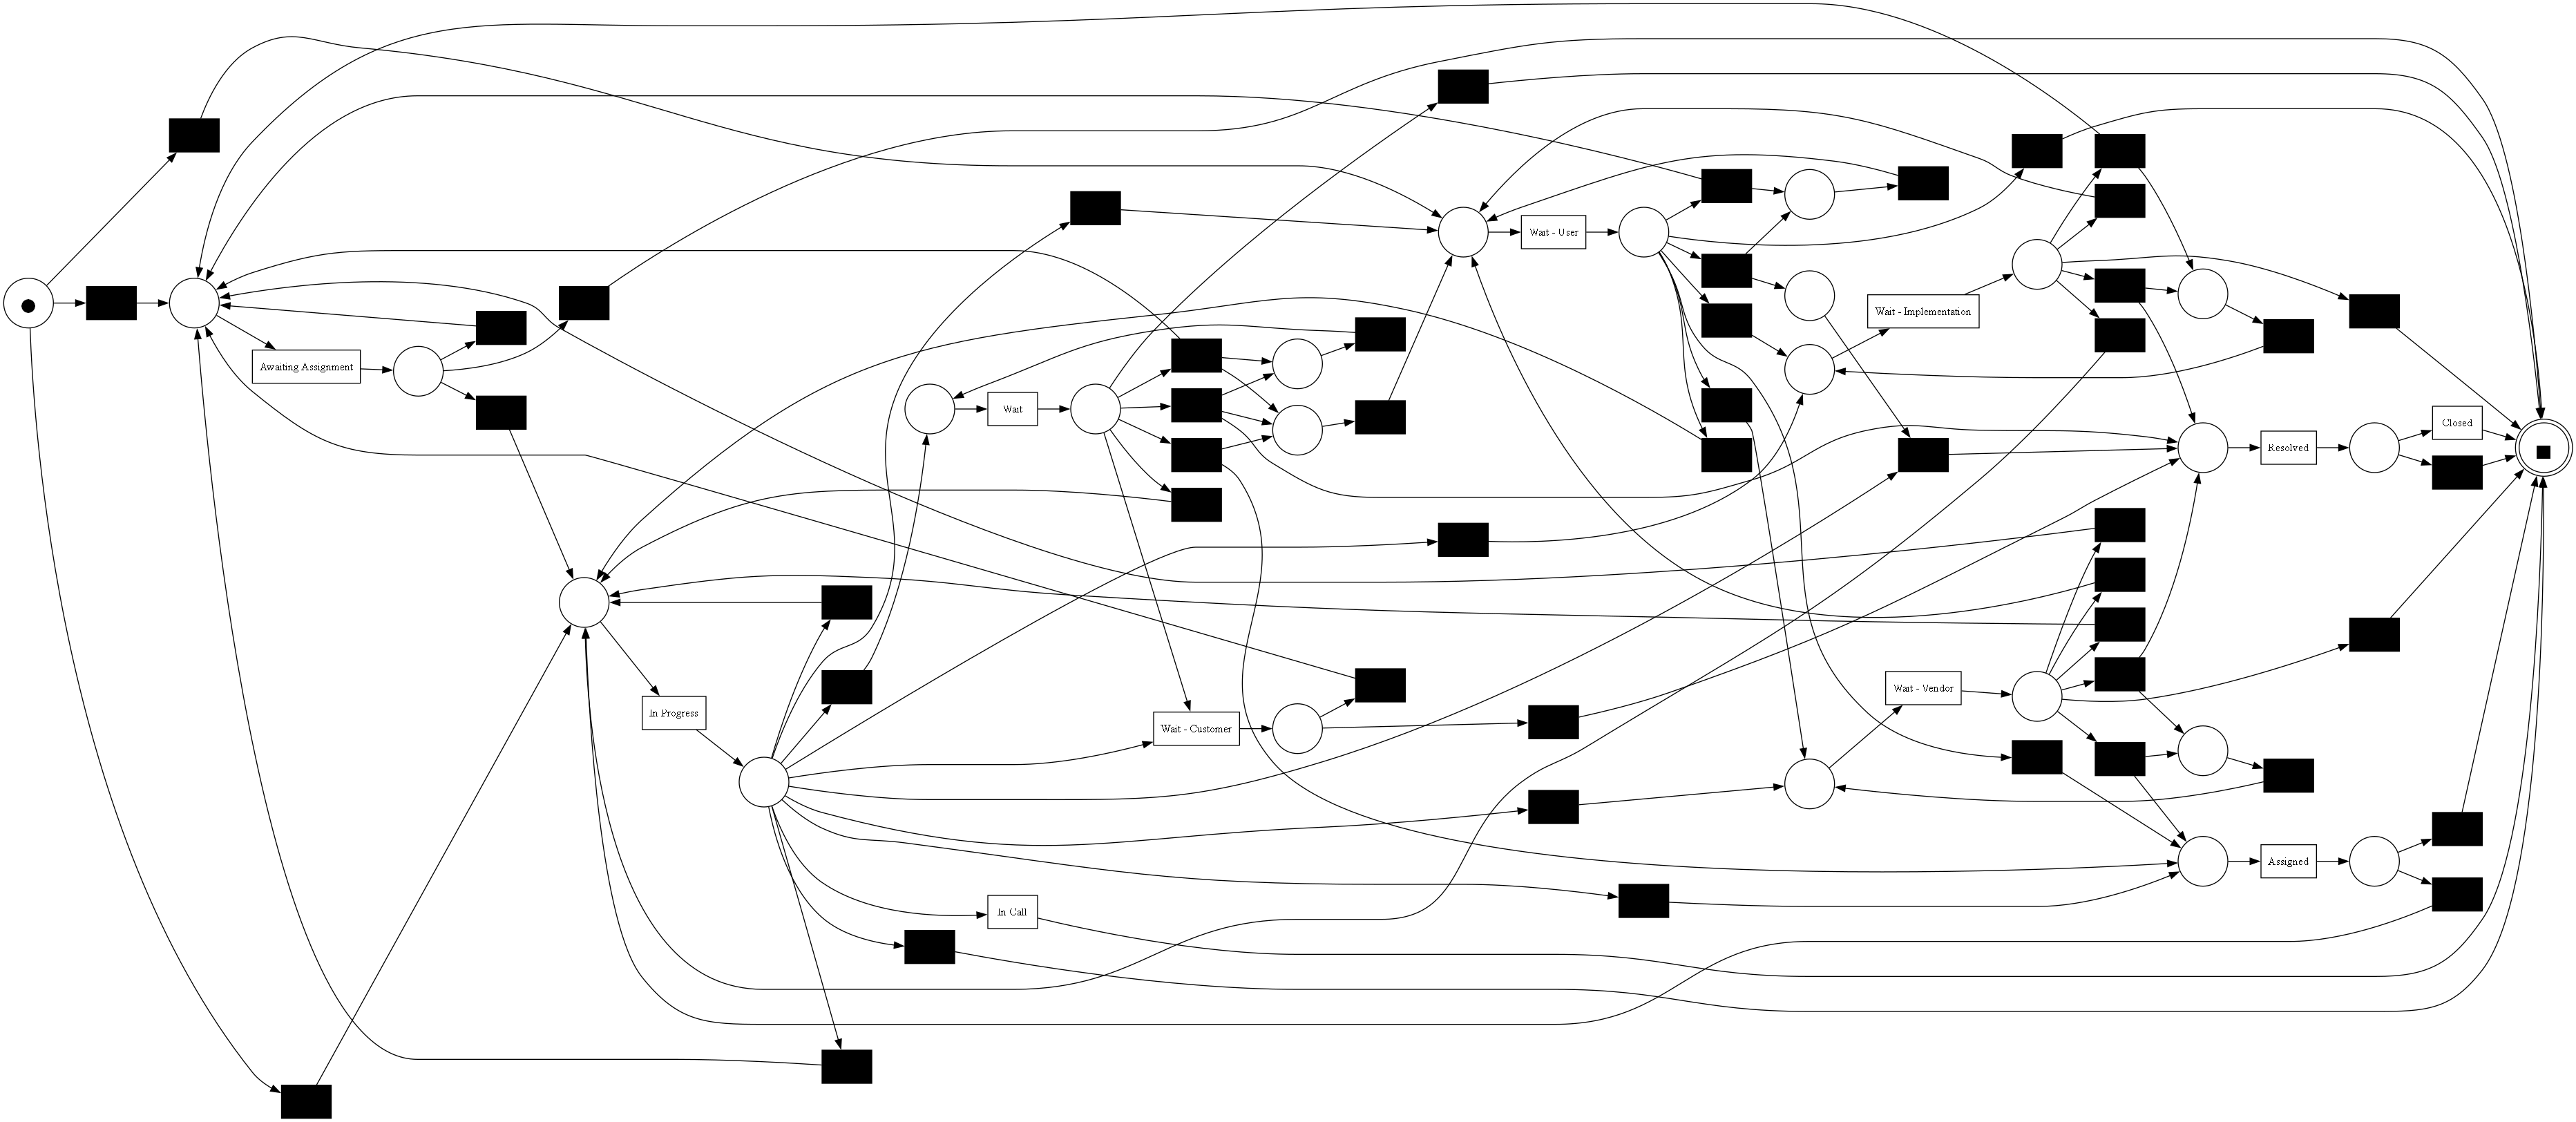

replaying log with TBR, completed traces :: 100%|██████████| 1560/1560 [00:02<00:00, 617.85it/s]


,case_id,is_fit,trace_fitness,missing,remaining,produced,consumed
0,1-467153946,False,0.958943,1,6,86,81
1,1-503573772,True,1.000000,0,0,10,10
2,1-504538555,True,1.000000,0,0,14,14
3,1-512795200,False,0.937729,3,5,65,63
4,1-522528740,True,1.000000,0,0,14,14
...,...,...,...,...,...,...,...
6098,1-740862080,False,0.923077,1,1,13,13
6099,1-740862126,True,1.000000,0,0,6,6
6100,1-740862164,True,1.000000,0,0,6,6
6101,1-740866691,True,1.000000,0,0,6,6


In [ ]:
# find petri net using the heuristics miner
net, im, fm = pm4py.discover_petri_net_heuristics(segmented_logs['Org line C'], activity_key='lifecycle:transition') 
# Visualise
pm4py.view_petri_net(net, im, fm, format='png')


opt_parameters = {'return_object_names': True}

tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(segmented_logs['Org line C'], net, im, fm, return_diagnostics_dataframe=True, activity_key='lifecycle:transition')

# return results in a dataframe
# trace_fitness: model fitness
# missing: the real case requires an activity not foreseen by the model
# remaining: the model foresees activities that did not occur
# produced: how many transitions were activated correctly
# consumed: balances with tokens produced in a perfect case
tbr_diagnostics

In [105]:
print("fitness mean: {:.2f}\nfitness median: {:.2f}\nmissing mean: {:.2f}\nremaining mean: {:.2f}".format(tbr_diagnostics['trace_fitness'].mean(), tbr_diagnostics['trace_fitness'].median(), tbr_diagnostics['missing'].mean(), tbr_diagnostics['remaining'].mean())) # shows the mean fitness of the traces".format(tbr_diagnostics['trace_fitness'].mean())) # shows the mean fitness of the traces

fitness mean: 0.95
fitness median: 0.96
missing mean: 0.58
remaining mean: 0.97


In [ ]:
opt_parameters = {'return_object_names': True}

tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(segmented_logs['Org line A2'] , net, im, fm, return_diagnostics_dataframe=True,  activity_key='lifecycle:transition')
# return results in a dataframe
# trace_fitness: model fitness
# missing: the real case requires an activity not foreseen by the model
# remaining: the model foresees activities that did not occur
# produced: how many transitions were activated correctly
# consumed: balances with tokens produced in a perfect case
tbr_diagnostics


replaying log with TBR, completed traces :: 100%|██████████| 44/44 [00:00<00:00, 1096.80it/s]


,case_id,is_fit,trace_fitness,missing,remaining,produced,consumed
0,1-559795575,True,1.000000,0,0,4,4
1,1-601328051,True,1.000000,0,0,6,6
2,1-693352046,False,0.909926,1,2,17,16
3,1-694845331,True,1.000000,0,0,6,6
4,1-700161985,False,0.968750,1,0,15,16
...,...,...,...,...,...,...,...
203,1-740675920,False,0.857143,1,1,7,7
204,1-740692523,False,0.857143,1,1,7,7
205,1-740781048,False,0.857143,1,1,7,7
206,1-740781165,False,0.857143,1,1,7,7


In [107]:
print("fitness mean: {:.2f}\nfitness median: {:.2f}\nmissing mean: {:.2f}\nremaining mean: {:.2f}".format(tbr_diagnostics['trace_fitness'].mean(), tbr_diagnostics['trace_fitness'].median(), tbr_diagnostics['missing'].mean(), tbr_diagnostics['remaining'].mean())) # shows the mean fitness of the traces".format(tbr_diagnostics['trace_fitness'].mean())) # shows the mean fitness of the traces

fitness mean: 0.90
fitness median: 0.86
missing mean: 0.74
remaining mean: 0.77


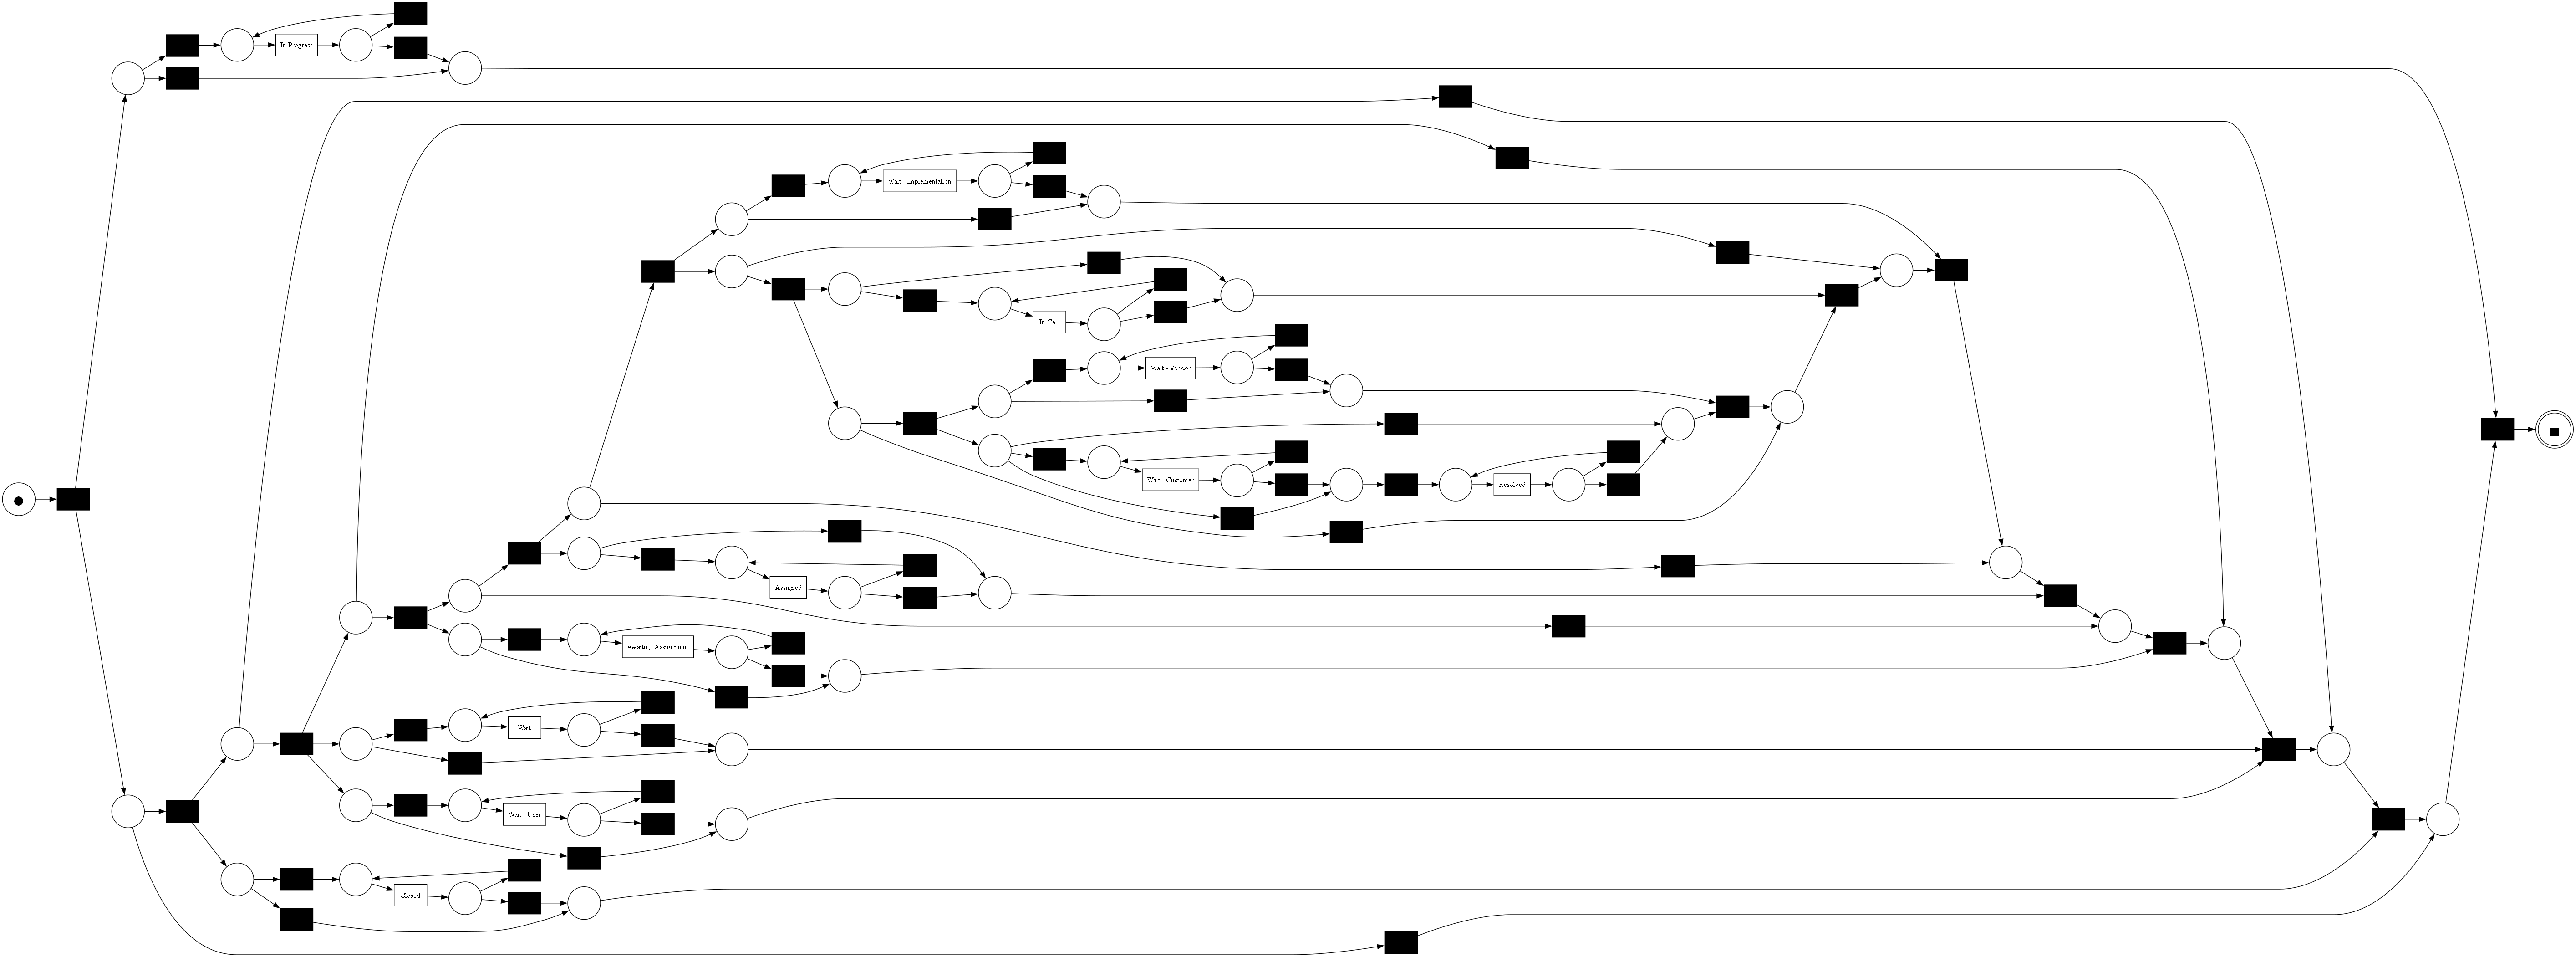

replaying log with TBR, completed traces :: 100%|██████████| 1560/1560 [00:03<00:00, 511.49it/s]


,case_id,is_fit,trace_fitness,missing,remaining,produced,consumed
0,1-467153946,True,1.0,0,0,117,117
1,1-503573772,True,1.0,0,0,28,28
2,1-504538555,True,1.0,0,0,36,36
3,1-512795200,True,1.0,0,0,101,101
4,1-522528740,True,1.0,0,0,36,36
...,...,...,...,...,...,...,...
6098,1-740862080,True,1.0,0,0,51,51
6099,1-740862126,True,1.0,0,0,38,38
6100,1-740862164,True,1.0,0,0,38,38
6101,1-740866691,True,1.0,0,0,38,38


In [112]:
# find petri net using the heuristics miner
net, im, fm = pm4py.discover_petri_net_inductive(segmented_logs['Org line C'], activity_key='lifecycle:transition') # net: rete di petri scoperta, im: stato iniziale della rete, fm: stato finale della rete
# Visualise
pm4py.view_petri_net(net, im, fm, format='png')


opt_parameters = {'return_object_names': True}

tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(segmented_logs['Org line C'], net, im, fm, return_diagnostics_dataframe=True, activity_key='lifecycle:transition')

tbr_diagnostics

In [113]:
print("fitness mean: {:.2f}\nfitness median: {:.2f}\nmissing mean: {:.2f}\nremaining mean: {:.2f}".format(tbr_diagnostics['trace_fitness'].mean(), tbr_diagnostics['trace_fitness'].median(), tbr_diagnostics['missing'].mean(), tbr_diagnostics['remaining'].mean())) # shows the mean fitness of the traces".format(tbr_diagnostics['trace_fitness'].mean())) # shows the mean fitness of the traces

fitness mean: 1.00
fitness median: 1.00
missing mean: 0.00
remaining mean: 0.00


In [ ]:
opt_parameters = {'return_object_names': True}

tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(segmented_logs['Org line G4'], net, im, fm, return_diagnostics_dataframe=True,activity_key='lifecycle:transition')

tbr_diagnostics

replaying log with TBR, completed traces :: 100%|██████████| 44/44 [00:00<00:00, 906.13it/s]


,case_id,is_fit,trace_fitness,missing,remaining,produced,consumed
0,1-559795575,True,1.0,0,0,22,22
1,1-601328051,True,1.0,0,0,10,10
2,1-693352046,True,1.0,0,0,53,53
3,1-694845331,True,1.0,0,0,24,24
4,1-700161985,True,1.0,0,0,53,53
...,...,...,...,...,...,...,...
203,1-740675920,True,1.0,0,0,45,45
204,1-740692523,True,1.0,0,0,45,45
205,1-740781048,True,1.0,0,0,45,45
206,1-740781165,True,1.0,0,0,45,45


In [120]:
print("fitness mean: {:.2f}\nfitness median: {:.2f}\nmissing mean: {:.2f}\nremaining mean: {:.2f}".format(tbr_diagnostics['trace_fitness'].mean(), tbr_diagnostics['trace_fitness'].median(), tbr_diagnostics['missing'].mean(), tbr_diagnostics['remaining'].mean())) # shows the mean fitness of the traces".format(tbr_diagnostics['trace_fitness'].mean())) # shows the mean fitness of the traces

fitness mean: 1.00
fitness median: 1.00
missing mean: 0.00
remaining mean: 0.00
